In [1]:
from beautylogger import BeautyLogger
import numpy as np
import torch
from torch import nn
import torchvision
from tqdm import tqdm_notebook
%matplotlib inline

In [2]:
dset_train = torchvision.datasets.MNIST('.', download=True, transform=torchvision.transforms.ToTensor())
dset_test = torchvision.datasets.MNIST('.', train=False, download=True, transform=torchvision.transforms.ToTensor())

In [3]:
train_loader = torch.utils.data.DataLoader(dset_train, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(dset_test, batch_size=1024)

In [4]:
class Flatten(nn.Module):
    def forward(self, x):
        return x.reshape(x.shape[0], -1)

model = nn.Sequential(nn.Conv2d(1, 16, 3, padding=1),
                      nn.ReLU(),
                      nn.MaxPool2d(2),
                      nn.Conv2d(16, 32, 3, padding=1),
                      nn.ReLU(),
                      nn.MaxPool2d(2),
                      Flatten(),
                      nn.Linear(32*7*7, 2048), nn.ReLU(),
                      nn.Linear(2048, 2048), nn.ReLU(),
                      nn.Linear(2048, 10))

In [5]:
optim = torch.optim.Adam(model.parameters(), lr=3e-4)
optim.zero_grad()

In [6]:
criterion = nn.CrossEntropyLoss()

In [7]:
logger = BeautyLogger()

from sklearn.metrics import accuracy_score
logger.add_calculable(['label', 'prediction'], 'acc', lambda l,p: accuracy_score(l, np.argmax(p, -1)))

logger.add_plot('ce')
logger.add_plot('acc')

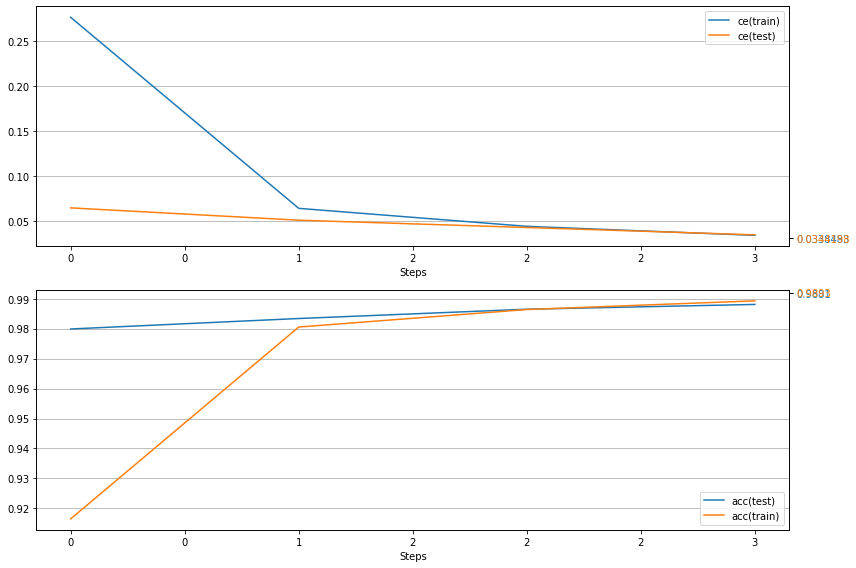

KeyboardInterrupt: 

In [8]:
for epoch in range(50):
    for x, y in tqdm_notebook(train_loader):
        p = model(x)
        
        loss = criterion(p, y)
        
        logger.log_step(ce=loss.item(), label=y, prediction=p)
        
        loss.backward()
        optim.step()
        optim.zero_grad()
    
    with torch.no_grad():
        for x, y in tqdm_notebook(test_loader):
            p = model(x)

            loss = criterion(p, y)

            logger.log_step('test', ce=loss.item(), label=y, prediction=p)
    
    logger.log_epoch()
    logger.plot()